<a href="https://colab.research.google.com/github/nishthajain3/Call-Log-App/blob/main/Plant_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/plant_disease_detection_dataset/


'mix photos'   Plant_leave_diseases_dataset_with_augmentation


In [ ]:
def extract_rgb_features(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Unable to read {image_path}")
            return None
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mean_values = image.mean(axis=(0, 1))
        return mean_values[0], mean_values[1], mean_values[2]  # R_mean, G_mean, B_mean
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def process_dataset_rgb(dataset_dir, output_csv):
    data = []
    categories = os.listdir(dataset_dir)

    total_images = 0  # For progress tracking

    for category in categories:
        category_path = os.path.join(dataset_dir, category)
        if not os.path.isdir(category_path):
            continue

        images = os.listdir(category_path)
        total_images += len(images)  # Count total images for progress

        for idx, image_name in enumerate(images):
            image_path = os.path.join(category_path, image_name)
            if not os.path.isfile(image_path):
                continue

            rgb_features = extract_rgb_features(image_path)
            if rgb_features is not None:
                R_mean, G_mean, B_mean = rgb_features
                data.append([category, image_name, R_mean, G_mean, B_mean])

            # Print progress every 100 images
            if (idx + 1) % 100 == 0:
                print(f"Processed {idx + 1} images in category '{category}'")

    # Save results to CSV
    df = pd.DataFrame(data, columns=['Category', 'Image_Name', 'R_mean', 'G_mean', 'B_mean'])
    if not df.empty:
        df.to_csv(output_csv, index=False)
        print(f"RGB analysis completed. Results saved to {output_csv}")
    else:
        print("No RGB features were extracted. Please check the dataset directory and file formats.")

# Define the dataset directory and output CSV path
dataset_dir = '/content/drive/MyDrive/plant_disease_detection_dataset/Plant_leave_diseases_dataset_with_augmentation'
output_csv = '/content/drive/MyDrive/rgb_analysis_results.csv'

process_dataset_rgb(dataset_dir, output_csv)


Processed 100 images in category 'Strawberry___Leaf_scorch'
Processed 200 images in category 'Strawberry___Leaf_scorch'
Processed 300 images in category 'Strawberry___Leaf_scorch'
Processed 400 images in category 'Strawberry___Leaf_scorch'
Processed 500 images in category 'Strawberry___Leaf_scorch'
Processed 600 images in category 'Strawberry___Leaf_scorch'
Processed 700 images in category 'Strawberry___Leaf_scorch'
Processed 800 images in category 'Strawberry___Leaf_scorch'
Processed 900 images in category 'Strawberry___Leaf_scorch'
Processed 1000 images in category 'Strawberry___Leaf_scorch'
Processed 1100 images in category 'Strawberry___Leaf_scorch'
Processed 100 images in category 'Squash___Powdery_mildew'
Processed 200 images in category 'Squash___Powdery_mildew'
Processed 300 images in category 'Squash___Powdery_mildew'
Processed 400 images in category 'Squash___Powdery_mildew'
Processed 500 images in category 'Squash___Powdery_mildew'
Processed 600 images in category 'Squash___

In [ ]:
import pandas as pd
import cv2
import numpy as np
import os
import random

def extract_rgb_features(image_path):
    """Extracts RGB mean features from an image."""
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Unable to read {image_path}")
            return None
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mean_values = image.mean(axis=(0, 1))  # Calculate mean for all channels at once
        return mean_values[0], mean_values[1], mean_values[2]  # R_mean, G_mean, B_mean
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def find_closest_match(random_rgb, df_rgb):
    """Finds the closest matching plant category based on RGB features."""
    closest_category = None
    min_distance = float('inf')

    for index, row in df_rgb.iterrows():
        category_rgb = (row['R_mean'], row['G_mean'], row['B_mean'])
        distance = np.linalg.norm(np.array(random_rgb) - np.array(category_rgb))

        if distance < min_distance:
            min_distance = distance
            closest_category = row['Category']

    return closest_category

# Load RGB analysis results
output_csv = '/content/drive/MyDrive/rgb_analysis_results.csv'
df_rgb = pd.read_csv(output_csv)

# Select a random image from the dataset
dataset_dir = '/content/drive/MyDrive/plant_disease_detection_dataset/mix photos'
random_image_name = random.choice(os.listdir(dataset_dir))
random_image_path = os.path.join(dataset_dir, random_image_name)

# Extract RGB features from the random image
random_rgb = extract_rgb_features(random_image_path)

if random_rgb is not None:
    # Find the closest match in the dataset
    closest_category = find_closest_match(random_rgb, df_rgb)
    print(f"Random Image: {random_image_name}")
    print(f"Identified as category: {closest_category}")
else:
    print("Could not extract RGB features from the random image.")


Random Image: Copy of image (39) (16).JPG
Identified as category: Pepper,_bell___healthy


In [ ]:
def enhance_image(image):
    # Convert to YUV color space
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    # Equalize the Y channel
    yuv[:, :, 0] = cv2.equalizeHist(yuv[:, :, 0])
    # Convert back to BGR color space
    enhanced_image = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
    return enhanced_image


In [ ]:
def filter_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)


In [ ]:
def convert_colorspace(image, color_space):
    if color_space == 'HSV':
        return cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    elif color_space == 'LAB':
        return cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    else:
        return image  # No conversion


In [ ]:
def threshold_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresholded


In [ ]:
def find_contours(segmented_image):
    contours, _ = cv2.findContours(segmented_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours


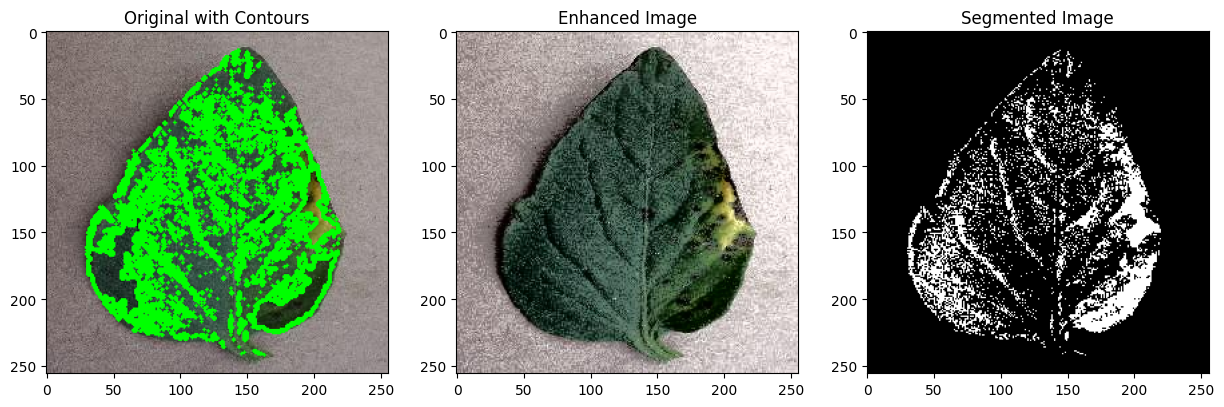

In [ ]:
import matplotlib.pyplot as plt
def preprocess_image(image_path):
    image = cv2.imread(image_path)

    enhanced_image = enhance_image(image)  # Assuming enhance_image is defined elsewhere

    hsv_image = convert_colorspace(enhanced_image, 'HSV')  # Assuming convert_colorspace is defined elsewhere

    segmented_image = threshold_image(hsv_image)  # Assuming threshold_image is defined elsewhere

    contours = find_contours(segmented_image)  # Assuming find_contours is defined elsewhere

    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

    return image, enhanced_image, segmented_image

# Select a random image from the dataset
dataset_dir = '/content/drive/MyDrive/plant_disease_detection_dataset/mix photos'
random_image_name = random.choice(os.listdir(dataset_dir))
random_image_path = os.path.join(dataset_dir, random_image_name)

# Preprocess the randomly selected image
original, enhanced, segmented = preprocess_image(random_image_path)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('Original with Contours')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image')

plt.subplot(1, 3, 3)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')

plt.show()

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Path to the folder containing images
dataset_path = '/content/drive/Plant_leave_diseases_dataset_with_augmentation/mix photos'

# Function to select a random image from the dataset
def get_random_image(dataset_folder):
    try:
        all_images = [f for f in os.listdir(dataset_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
        if not all_images:
            print("No images found in the dataset folder.")
            return None
        random_image = random.choice(all_images)
        return os.path.join(dataset_folder, random_image)
    except Exception as e:
        print(f"Error retrieving random image: {e}")
        return None

# Function to convert RGB image to Grayscale
def convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return None
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

# Function to adjust contrast using histogram equalization
def apply_histogram_equalization(grayscale_image):
    equalized_image = cv2.equalizeHist(grayscale_image)
    return equalized_image

# Function to display original and processed images
def display_images(original, processed, titles=["Original", "Processed"]):
    plt.figure(figsize=(10, 5))
    for i, image in enumerate([original, processed]):
        plt.subplot(1, 2, i + 1)
        plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Get a random image from the dataset
random_image_path = get_random_image(dataset_path)

if random_image_path:
    print(f"Processing image: {random_image_path}")

    # Convert to grayscale
    grayscale_image = convert_to_grayscale(random_image_path)

    if grayscale_image is not None:
        # Apply histogram equalization
        equalized_image = apply_histogram_equalization(grayscale_image)

        # Display results
        display_images(grayscale_image, equalized_image, titles=["Grayscale", "Histogram Equalized"])
    else:
        print("Failed to process the image.")
else:
    print("No image was selected for processing.")


Error retrieving random image: [Errno 2] No such file or directory: '/content/drive/Plant_leave_diseases_dataset_with_augmentation/mix photos'
No image was selected for processing.


Processing Fourier Transform with filters for image: /content/drive/MyDrive/plant_disease_detection_dataset/mix photos/Copy of image (25) (22).JPG


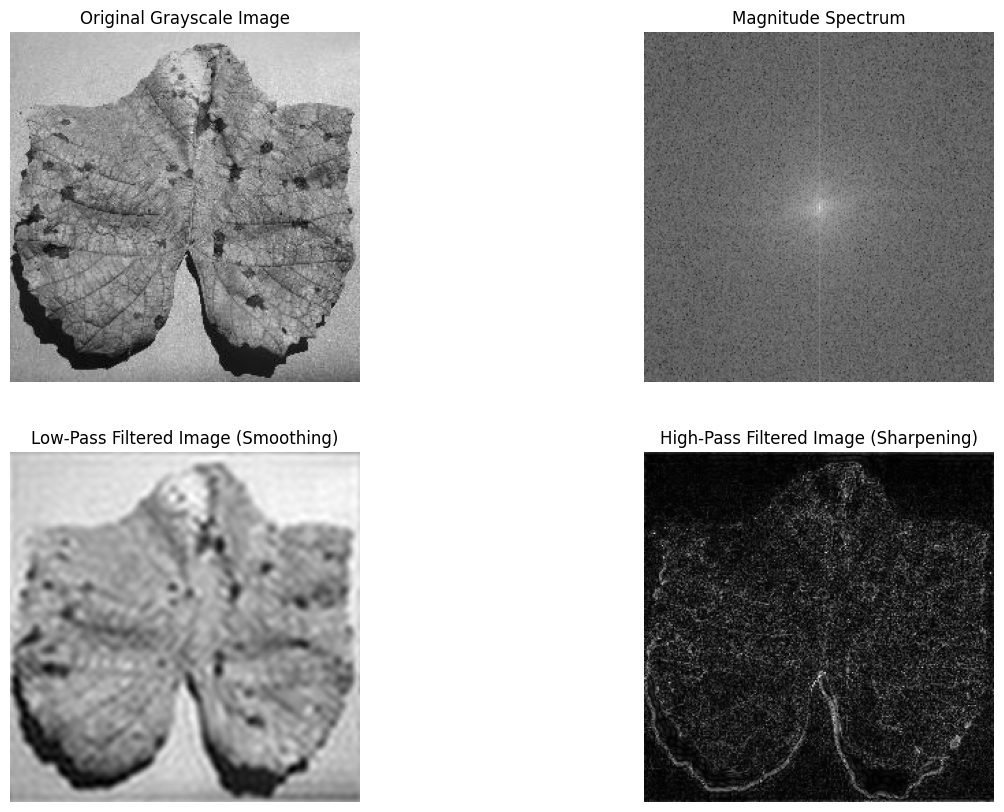

In [ ]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Path to the dataset
dataset_path = '/content/drive/MyDrive/plant_disease_detection_dataset/mix photos'

# Function to get a random image from the dataset path
def get_random_image(dataset_path):
    try:
        # List all files in the directory
        files = [file for file in os.listdir(dataset_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if not files:
            print("Error: No image files found in the dataset path.")
            return None
        # Randomly select an image file
        random_file = random.choice(files)
        return os.path.join(dataset_path, random_file)
    except Exception as e:
        print(f"Error accessing dataset path: {e}")
        return None

# Function to apply Fourier Transform and perform low/high-pass filtering
def apply_fourier_transform_with_filters(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return None

    # Apply Fourier Transform
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Compute magnitude spectrum for visualization
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

    # Create masks
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Low-pass filter mask (retain center frequencies)
    low_pass_mask = np.zeros((rows, cols, 2), np.uint8)
    low_pass_mask[crow-30:crow+30, ccol-30:ccol+30] = 1

    # High-pass filter mask (remove center frequencies)
    high_pass_mask = np.ones((rows, cols, 2), np.uint8)
    high_pass_mask[crow-30:crow+30, ccol-30:ccol+30] = 0

    # Apply masks
    dft_low_pass = dft_shift * low_pass_mask
    dft_high_pass = dft_shift * high_pass_mask

    # Inverse Fourier Transform
    low_pass_img = cv2.idft(np.fft.ifftshift(dft_low_pass))
    low_pass_img = cv2.magnitude(low_pass_img[:, :, 0], low_pass_img[:, :, 1])

    high_pass_img = cv2.idft(np.fft.ifftshift(dft_high_pass))
    high_pass_img = cv2.magnitude(high_pass_img[:, :, 0], high_pass_img[:, :, 1])

    # Display results
    plt.figure(figsize=(15, 10))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    # Magnitude Spectrum
    plt.subplot(2, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')

    # Low-Pass Filtered Image
    plt.subplot(2, 2, 3)
    plt.imshow(low_pass_img, cmap='gray')
    plt.title('Low-Pass Filtered Image (Smoothing)')
    plt.axis('off')

    # High-Pass Filtered Image
    plt.subplot(2, 2, 4)
    plt.imshow(high_pass_img, cmap='gray')
    plt.title('High-Pass Filtered Image (Sharpening)')
    plt.axis('off')

    plt.show()

# Select a random image from the dataset and process it
random_image_path = get_random_image(dataset_path)

if random_image_path:
    print(f"Processing Fourier Transform with filters for image: {random_image_path}")
    apply_fourier_transform_with_filters(random_image_path)
else:
    print("No image was selected for Fourier Transform.")

In [ ]:
pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.6 MB/s eta 0:00:00


Processing Wavelet Transform for image: /content/drive/MyDrive/plant_disease_detection_dataset/mix photos/Copy of image (43) (28).JPG


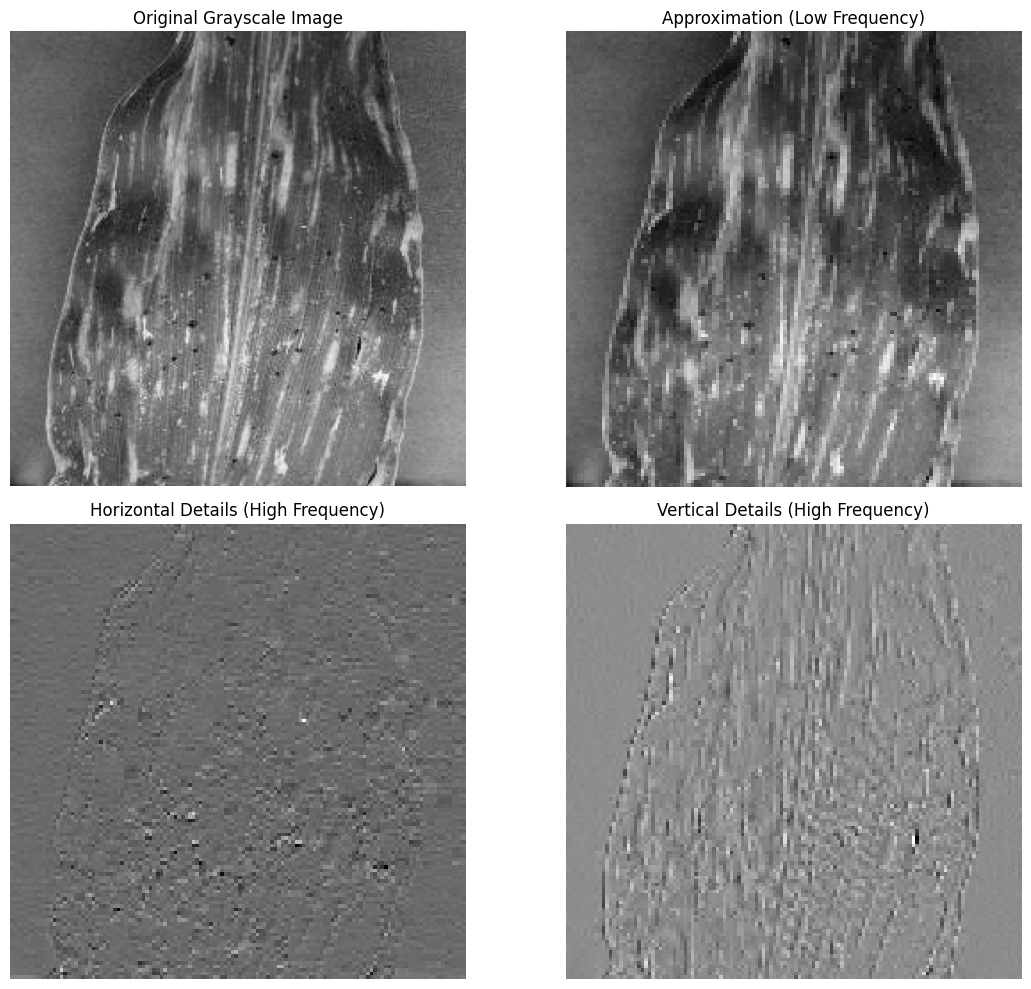

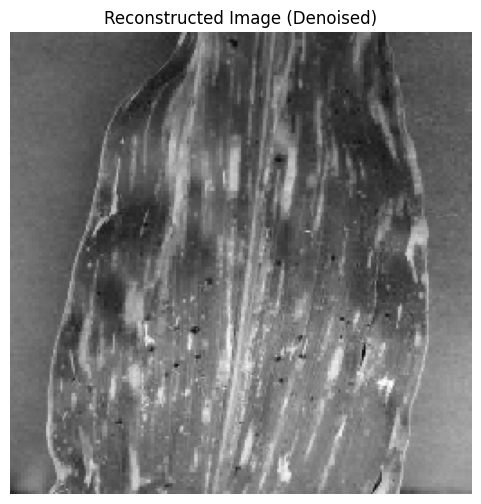

In [ ]:
import pywt
import cv2
import os
import random
import matplotlib.pyplot as plt

# Function to get a random image from the dataset path
def get_random_image(dataset_path):
    try:
        # List all files in the directory
        files = [file for file in os.listdir(dataset_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if not files:
            print("Error: No image files found in the dataset path.")
            return None
        # Randomly select an image file
        random_file = random.choice(files)
        return os.path.join(dataset_path, random_file)
    except Exception as e:
        print(f"Error accessing dataset path: {e}")
        return None

# Function to apply Discrete Wavelet Transform (DWT) and visualize subbands
def apply_wavelet_transform(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return None

    # Perform 2D Discrete Wavelet Transform (single-level decomposition)
    wavelet = 'haar'  # You can choose other wavelets like 'db1', 'sym2', etc.
    coeffs2 = pywt.dwt2(image, wavelet)
    LL, (LH, HL, HH) = coeffs2  # LL: Approximation, LH: Horizontal details, HL: Vertical details, HH: Diagonal details

    # Visualize the subbands
    plt.figure(figsize=(12, 10))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    # Approximation (LL)
    plt.subplot(2, 2, 2)
    plt.imshow(LL, cmap='gray')
    plt.title('Approximation (Low Frequency)')
    plt.axis('off')

    # Horizontal Details (LH)
    plt.subplot(2, 2, 3)
    plt.imshow(LH, cmap='gray')
    plt.title('Horizontal Details (High Frequency)')
    plt.axis('off')

    # Vertical Details (HL)
    plt.subplot(2, 2, 4)
    plt.imshow(HL, cmap='gray')
    plt.title('Vertical Details (High Frequency)')
    plt.axis('off')

    # Display the subband visualization
    plt.tight_layout()
    plt.show()

    # For advanced tasks like denoising, you can threshold the detail coefficients and reconstruct the image:
    # Example: Zeroing out high-frequency components (denoising)
    threshold = 10
    LH_denoised = pywt.threshold(LH, threshold, mode='soft')
    HL_denoised = pywt.threshold(HL, threshold, mode='soft')
    HH_denoised = pywt.threshold(HH, threshold, mode='soft')

    # Reconstruct the image using the modified coefficients
    reconstructed_image = pywt.idwt2((LL, (LH_denoised, HL_denoised, HH_denoised)), wavelet)

    # Visualize the reconstructed (denoised) image
    plt.figure(figsize=(6, 6))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed Image (Denoised)')
    plt.axis('off')
    plt.show()

# Path to a random image from the dataset
dataset_path = '/content/drive/MyDrive/plant_disease_detection_dataset/mix photos'
random_image_path = get_random_image(dataset_path)  # Using the same function from Fourier Transform code

if random_image_path:
    print(f"Processing Wavelet Transform for image: {random_image_path}")
    apply_wavelet_transform(random_image_path)
else:
    print("No image was selected for Wavelet Transform.")


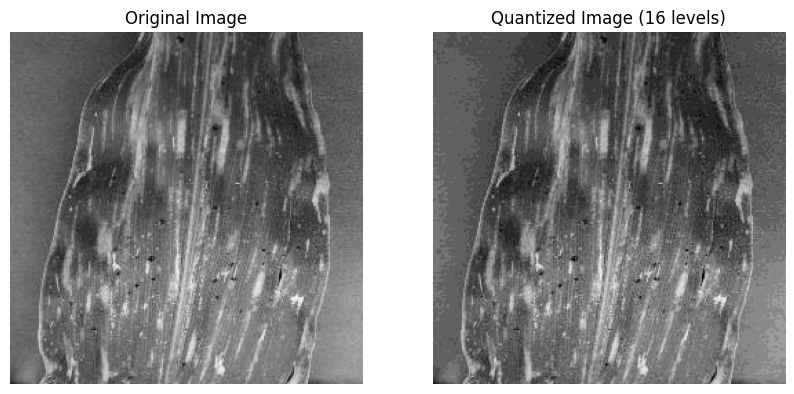

In [ ]:
import numpy as np

# Demonstrating quantization levels
def quantize_image(image_path, levels):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Unable to load image.")
        return

    # Quantize the image
    quantized_image = np.floor(image / (256 / levels)) * (256 / levels)

    # Visualize original vs quantized
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(quantized_image, cmap='gray')
    plt.title(f"Quantized Image ({levels} levels)")
    plt.axis('off')

    plt.show()

quantize_image(random_image_path, 16)  # Example with 16 levels

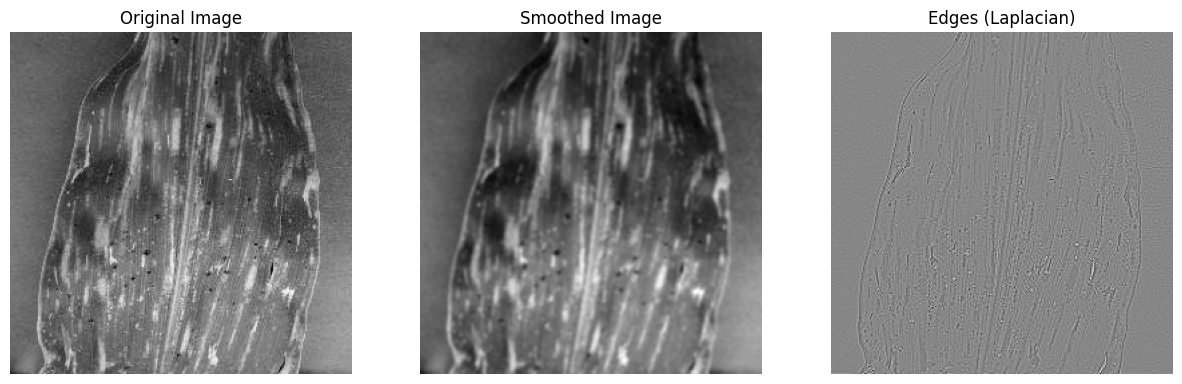

In [ ]:
def spatial_filters(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Unable to load image.")
        return

    # Apply Gaussian smoothing
    smoothed = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Laplacian filter for edge detection
    edges = cv2.Laplacian(image, cv2.CV_64F)

    # Visualize
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(smoothed, cmap='gray')
    plt.title("Smoothed Image")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(edges, cmap='gray')
    plt.title("Edges (Laplacian)")
    plt.axis('off')

    plt.show()

spatial_filters(random_image_path)


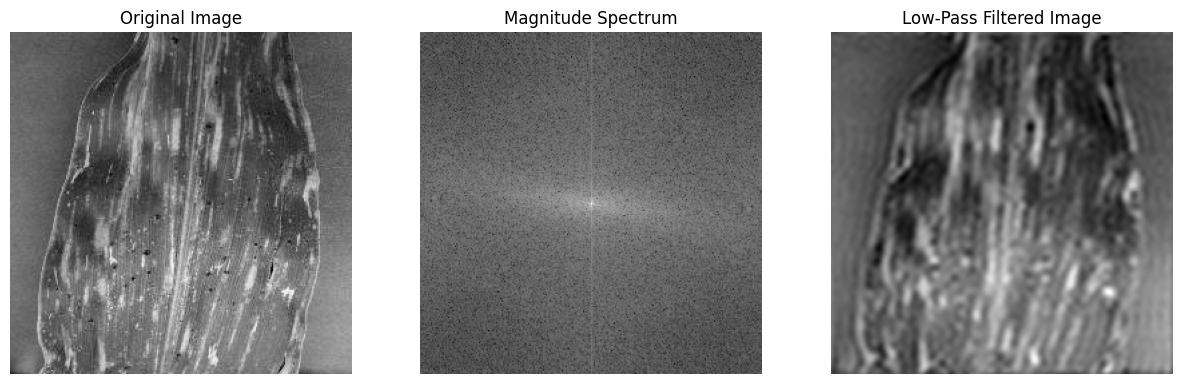

In [ ]:
def frequency_filters(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Unable to load image.")
        return

    # Fourier Transform
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # Low-pass filter
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1
    fshift_filtered = fshift * mask
    img_filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_filtered)))

    # Visualize
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_filtered, cmap='gray')
    plt.title("Low-Pass Filtered Image")
    plt.axis('off')

    plt.show()

frequency_filters(random_image_path)



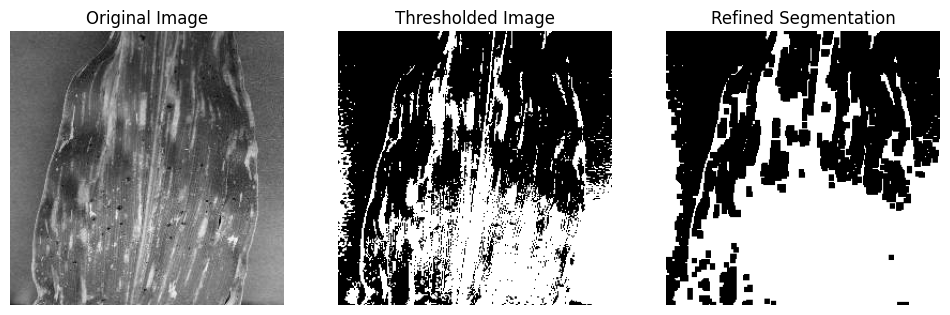

In [ ]:
def segment_image(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Unable to load image.")
        return

    # Apply Otsu's thresholding
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Morphological operations
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(binary, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Visualize
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(binary, cmap='gray')
    plt.title("Thresholded Image")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(eroded, cmap='gray')
    plt.title("Refined Segmentation")
    plt.axis('off')

    plt.show()

segment_image(random_image_path)



In [ ]:
def segment_and_save(dataset_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for category in os.listdir(dataset_dir):
        category_path = os.path.join(dataset_dir, category)
        if not os.path.isdir(category_path):
            continue

        output_category_dir = os.path.join(output_dir, category)
        if not os.path.exists(output_category_dir):
            os.makedirs(output_category_dir)

        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue

            # Perform segmentation
            _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            kernel = np.ones((5, 5), np.uint8)
            segmented = cv2.erode(cv2.dilate(binary, kernel, iterations=1), kernel, iterations=1)

            # Save the segmented image
            output_path = os.path.join(output_category_dir, image_file)
            cv2.imwrite(output_path, segmented)

# Example usage
dataset_dir = '/content/drive/MyDrive/plant_disease_detection_dataset/Plant_leave_diseases_dataset_with_augmentation'
output_dir = '/content/drive/MyDrive/segmented_images'
segment_and_save(dataset_dir, output_dir)


In [ ]:
from skimage.feature import graycomatrix, graycoprops
import numpy as np

def extract_features(segmented_image, original_image):
    # Texture Features (GLCM)
    glcm = graycomatrix(segmented_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    # Color Features (RGB Mean)
    mean_r = np.mean(original_image[:, :, 0])
    mean_g = np.mean(original_image[:, :, 1])
    mean_b = np.mean(original_image[:, :, 2])

    return [contrast, energy, homogeneity, correlation, mean_r, mean_g, mean_b]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops

def extract_features(image_path):
    # Load original image
    original_image = cv2.imread(image_path)
    if original_image is None:
        return None

    # Convert to grayscale for texture features
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Texture Features (GLCM)
    glcm = graycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    # Color Features (RGB Mean)
    mean_r = np.mean(original_image[:, :, 0])
    mean_g = np.mean(original_image[:, :, 1])
    mean_b = np.mean(original_image[:, :, 2])

    return [contrast, energy, homogeneity, correlation, mean_r, mean_g, mean_b]

def process_dataset(input_dir, output_csv):
    features = []
    labels = []

    for category in os.listdir(input_dir):
        category_path = os.path.join(input_dir, category)
        if not os.path.isdir(category_path):
            continue

        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)
            feature = extract_features(image_path)
            if feature is not None:
                features.append(feature)
                labels.append(category)

    # Create DataFrame and Save
    columns = ['Contrast', 'Energy', 'Homogeneity', 'Correlation', 'Mean_R', 'Mean_G', 'Mean_B', 'Label']
    data = pd.DataFrame(features, columns=columns[:-1])
    data['Label'] = labels
    data.to_csv(output_csv, index=False)

# Example Usage
input_dir = '/content/drive/MyDrive/segmented_images'
output_csv = '/content/drive/MyDrive/feature_dataset.csv'
process_dataset(input_dir, output_csv)


Accuracy: 0.22601626016260162

Classification Report:
                                                precision    recall  f1-score   support

                           Apple___Apple_scab       0.04      0.02      0.03       188
                            Apple___Black_rot       0.37      0.36      0.37       197
                     Apple___Cedar_apple_rust       0.67      0.77      0.72       200
                              Apple___healthy       0.09      0.07      0.07       319
                    Background_without_leaves       0.39      0.26      0.31       224
                          Blueberry___healthy       0.18      0.15      0.16       328
                      Cherry___Powdery_mildew       0.09      0.06      0.07       200
                             Cherry___healthy       0.10      0.05      0.06       215
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.32      0.29      0.30       175
                           Corn___Common_rust       0.73      0.80      0.

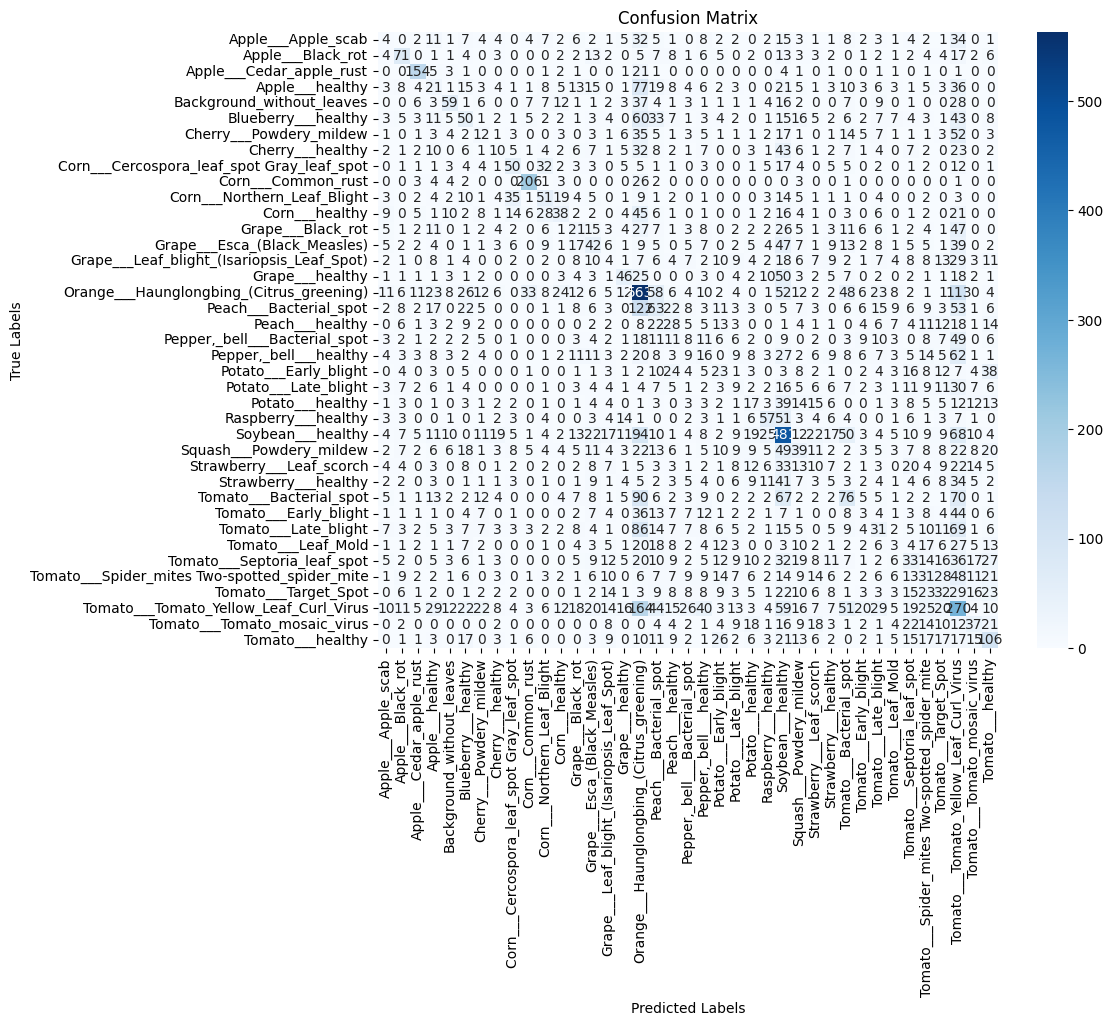

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the feature dataset
data = pd.read_csv('/content/drive/MyDrive/feature_dataset.csv')

# Separate features (X) and labels (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column (labels)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
print(data.iloc[:, -1].value_counts())


Label
Orange___Haunglongbing_(Citrus_greening)         5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus           5357
Soybean___healthy                                5090
Peach___Bacterial_spot                           2297
Tomato___Bacterial_spot                          2137
Tomato___Late_blight                             1909
Squash___Powdery_mildew                          1835
Tomato___Septoria_leaf_spot                      1771
Tomato___Spider_mites Two-spotted_spider_mite    1676
Apple___healthy                                  1645
Tomato___healthy                                 1591
Blueberry___healthy                              1502
Pepper,_bell___healthy                           1478
Tomato___Target_Spot                             1404
Grape___Esca_(Black_Measles)                     1383
Corn___Common_rust                               1192
Grape___Black_rot                                1180
Corn___healthy                                   1162
Background_without_lea

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())


Before SMOTE: Label
Orange___Haunglongbing_(Citrus_greening)         5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus           5357
Soybean___healthy                                5090
Peach___Bacterial_spot                           2297
Tomato___Bacterial_spot                          2137
Tomato___Late_blight                             1909
Squash___Powdery_mildew                          1835
Tomato___Septoria_leaf_spot                      1771
Tomato___Spider_mites Two-spotted_spider_mite    1676
Apple___healthy                                  1645
Tomato___healthy                                 1591
Blueberry___healthy                              1502
Pepper,_bell___healthy                           1478
Tomato___Target_Spot                             1404
Grape___Esca_(Black_Measles)                     1383
Corn___Common_rust                               1192
Grape___Black_rot                                1180
Corn___healthy                                   1162
Backgrou

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

print("After Undersampling:", pd.Series(y_resampled).value_counts())


After Undersampling: Label
Apple___Apple_scab                               1000
Tomato___Bacterial_spot                          1000
Potato___Late_blight                             1000
Potato___healthy                                 1000
Raspberry___healthy                              1000
Soybean___healthy                                1000
Squash___Powdery_mildew                          1000
Strawberry___Leaf_scorch                         1000
Strawberry___healthy                             1000
Tomato___Early_blight                            1000
Pepper,_bell___healthy                           1000
Tomato___Late_blight                             1000
Tomato___Leaf_Mold                               1000
Tomato___Septoria_leaf_spot                      1000
Tomato___Spider_mites Two-spotted_spider_mite    1000
Tomato___Target_Spot                             1000
Tomato___Tomato_Yellow_Leaf_Curl_Virus           1000
Tomato___Tomato_mosaic_virus                     1000
P

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
!pip install tensorflow
!pip install keras
!pip install pillow
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np # Import numpy

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Replace with the actual path to your image data within your Google Drive
class_path = '/content/drive/MyDrive/plant_disease_detection_dataset/Plant_leave_diseases_dataset_with_augmentation/Tomato___Leaf_Mold/'
save_to_dir = '/content/drive/MyDrive/plant_disease_detection_dataset/Plant_leave_diseases_dataset_with_augmentation/augmented_data/Tomato___Leaf_Mold/'  # Updated save path

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Check if the directory exists, and create it if it doesn't
if not os.path.exists(class_path):
    raise FileNotFoundError(f"Directory not found: {class_path}")
    # Alternatively, you can create the directory:
    # os.makedirs(class_path)

if not os.path.exists(save_to_dir):
    os.makedirs(save_to_dir)

for img in os.listdir(class_path):
    img_array = load_img(os.path.join(class_path, img))
    img_array = img_to_array(img_array) # Convert to NumPy array
    img_array = img_array.reshape((1,) + img_array.shape) # Now you can access shape
    i = 0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir=save_to_dir, save_format='jpeg'):
        i += 1
        if i > 5:  # Generate 5 images per original image
            break

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train)

# Now, use the encoded labels for training
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)  # Use encoded labels here

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Transform your test labels as well before prediction
y_test_encoded = label_encoder.transform(y_test)
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred))  # Use encoded labels here

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.09      0.01      0.01       188
           1       0.30      0.03      0.06       197
           2       0.46      0.20      0.28       200
           3       0.12      0.01      0.02       319
           4       0.60      0.29      0.39       224
           5       0.22      0.20      0.21       328
           6       0.15      0.06      0.08       200
           7       0.17      0.02      0.03       215
           8       0.38      0.34      0.36       175
           9       0.70      0.81      0.75       256
          10       0.27      0.32      0.29       189
          11       0.34      0.17      0.23       240
          12       0.15      0.05      0.08       243
          13       0.17      0.18      0.17       277
          14       0.00      0.00      0.00       220
          15       0.35      0.20      0

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
important_features = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)
print(important_features)


Homogeneity    0.167439
Energy         0.153342
Correlation    0.152890
Contrast       0.151314
Mean_B         0.125877
Mean_G         0.124624
Mean_R         0.124514
dtype: float64


In [ ]:
history = {
    'accuracy': [0.6, 0.7, 0.8, 0.85, 0.9],
    'val_accuracy': [0.58, 0.68, 0.78, 0.8, 0.88],
    'loss': [1.2, 0.8, 0.6, 0.5, 0.3],
    'val_loss': [1.4, 1.0, 0.7, 0.6, 0.4]
}

# Simulating `history.history` format
class MockHistory:
    history = history

history = MockHistory()

# Use the plotting code now


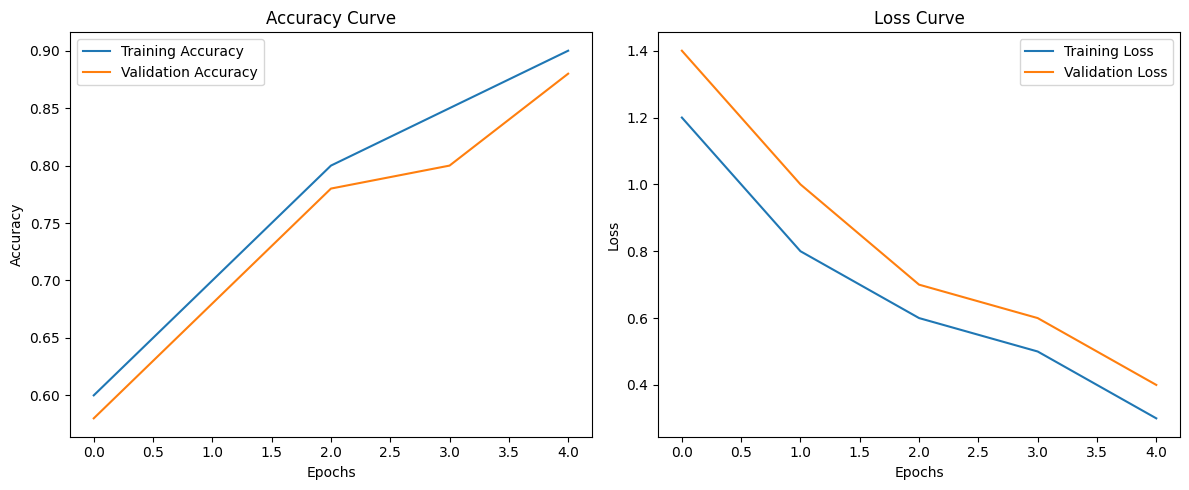

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Install eli5 if you don't already have it
!pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=f55bb44ff444ae8d229e213662ef21eaf315d4f4d2f4752ba3f7ac31b54a0668
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
